Importing pandas library

using pandas to download json and save to a DataFrame

In [13]:
import pandas as pd
pop_data_url = "https://data.cityofnewyork.us/resource/xi7c-iiu2.json"
population_dataframe = pd.read_json(pop_data_url)

In pandas, the head() method gives you the first 5 records or rows of the dataframe and tail() gives you the last 5

In [14]:
population_dataframe.head()

,borough,cd_number,cd_name,_1970_population,_1980_population,_1990_population,_2000_population,_2010_population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


Lets say we wanted to know how the population of NYC has changed over the course of these 10 year markers. 

The challenge: At the moment this dataframe shows population by community district, not borough. So we'll need to group records by borough and combine the populations of the community districts within each borough

In [15]:
#the column names of the years we want totals for
population_cols = [
    '_1970_population', '_1980_population', 
    '_1990_population', '_2000_population', '_2010_population'
]

#group by borough and then combine or "sum" the values for each of these population columns
population_by_boro = population_dataframe.groupby('borough')[population_cols].sum()

In [16]:
population_by_boro.head()

,_1970_population,_1980_population,_1990_population,_2000_population,_2010_population
borough,,,,,
Bronx,1478524,1170349,1197420,1327454,1380697
Brooklyn,2601668,2230849,2300650,2465299,2504609
Manhattan,1532399,1421260,1479844,1529357,1577385
Queens,1985995,1896401,1965471,2240510,2241021
Staten Island,294675,351866,378706,442588,467968


Here we're importing more libraries we'll need, creating the heatmap based on the population data frame, 

and visualizing it

Text(95.72222222222221, 0.5, 'Borough')

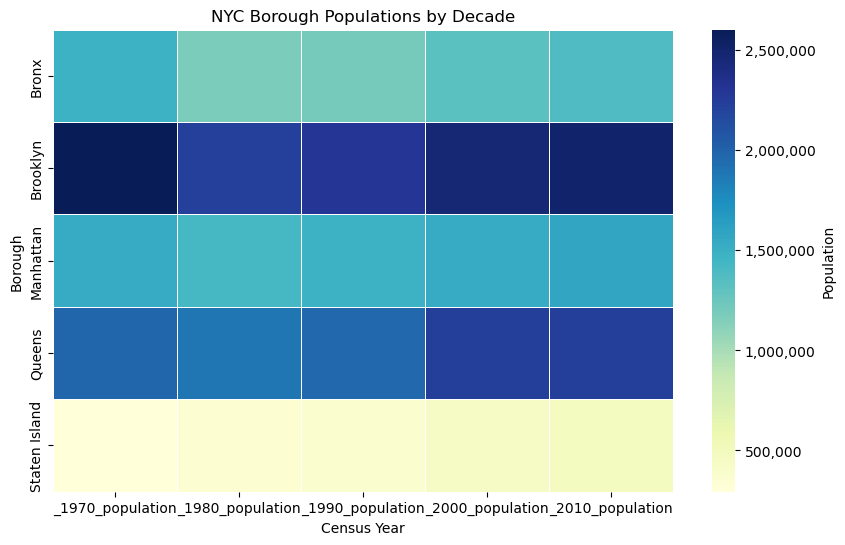

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))  # Determines the size of the visuzalition

ax = sns.heatmap(
    population_by_boro, 
    cmap="YlGnBu",    # You can choose any seaborn colormap
    linewidths=0.5,   # Adds lines between cells
    cbar_kws={'label': 'Population'} #Label the color bar
)
colorbar = ax.collections[0].colorbar
# This line makes the color bar scale based on the actual population number and not just 0 to 1
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}')) 

plt.title("NYC Borough Populations by Decade")
plt.xlabel("Census Year")
plt.ylabel("Borough")


What if we want to see the populations of community districts on a spatial map?

Our original dataframe has populations of these districts but we need to download the shapes to make the map 

In [6]:
population_dataframe.head()

,borough,cd_number,cd_name,_1970_population,_1980_population,_1990_population,_2000_population,_2010_population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


Using geopandas will help us handle spatial data which is downloaded from this url

In [7]:
import geopandas as gpd 
 
# Load GeoJSON
spatial_data = gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Community_Districts/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")

# Preview the first few rows
spatial_data.head()

,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry
0,1,308,4.560379e+07,38232.887315,"POLYGON ((-73.95829 40.67984, -73.95596 40.679..."
1,2,410,1.720774e+08,105822.377352,"MULTIPOLYGON (((-73.85722 40.65029, -73.85902 ..."
2,3,206,4.266432e+07,35875.709939,"POLYGON ((-73.87185 40.84377, -73.87192 40.843..."
3,4,480,3.277756e+07,47338.739592,"POLYGON ((-73.86272 40.76668, -73.86281 40.766..."
4,5,104,4.931005e+07,67546.045457,"POLYGON ((-73.99394 40.77319, -73.9937 40.7730..."


In order to make this spatial map of population we'll need to combine spatial_data and population_dataframe. There is a column they have in common that acts as the signal to merge rows

BoroCD from spatial_data and cd_number from population_dataframe

Both represent community districts IDs

But there's a problem - why do they look different? 

In [8]:
population_dataframe.shape

(59, 8)

This only has 59 CDs but the first row of BoroCD is 308. There is way less than 308 districts so why is it written like that?

In [18]:
# Now that we know that the first digit of a BoroCD describes the borough we need to create a new column containing the correctly f
# ormatted column values

spatial_data['cd_number'] = spatial_data['BoroCD']%100 # this column value is the remainder of BoroCD when divided by 100

spatial_data.head()



,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry,cd_number
0,1,308,4.560379e+07,38232.887315,"POLYGON ((-73.95829 40.67984, -73.95596 40.679...",8
1,2,410,1.720774e+08,105822.377352,"MULTIPOLYGON (((-73.85722 40.65029, -73.85902 ...",10
2,3,206,4.266432e+07,35875.709939,"POLYGON ((-73.87185 40.84377, -73.87192 40.843...",6
3,4,480,3.277756e+07,47338.739592,"POLYGON ((-73.86272 40.76668, -73.86281 40.766...",80
4,5,104,4.931005e+07,67546.045457,"POLYGON ((-73.99394 40.77319, -73.9937 40.7730...",4


Now that we have matching column names with correctly formatted values we can merge the two data frames

In [19]:
merged_data_frame = pd.merge(spatial_data, population_dataframe, on="cd_number")
merged_data_frame.head()

,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry,cd_number,borough,cd_name,_1970_population,_1980_population,_1990_population,_2000_population,_2010_population
0,1,308,4.560379e+07,38232.887315,"POLYGON ((-73.95829 40.67984, -73.95596 40.679...",8,Bronx,"Riverdale, Kingsbridge, Marble Hill",103543,98275,97030,101332,101731
1,1,308,4.560379e+07,38232.887315,"POLYGON ((-73.95829 40.67984, -73.95596 40.679...",8,Brooklyn,Crown Heights North,121821,88796,96400,96076,96317
2,1,308,4.560379e+07,38232.887315,"POLYGON ((-73.95829 40.67984, -73.95596 40.679...",8,Manhattan,Upper East Side,200851,204305,210880,217063,219920
3,1,308,4.560379e+07,38232.887315,"POLYGON ((-73.95829 40.67984, -73.95596 40.679...",8,Queens,"Fresh Meadows, Briarwood",142468,125312,132101,146594,151107
4,2,410,1.720774e+08,105822.377352,"MULTIPOLYGON (((-73.85722 40.65029, -73.85902 ...",10,Bronx,"Throgs Nk., Co-op City, Pelham Bay",84948,106516,108093,115948,120392


The matplotlib library will help us visualize the community district borders AND create a heatmap of the population

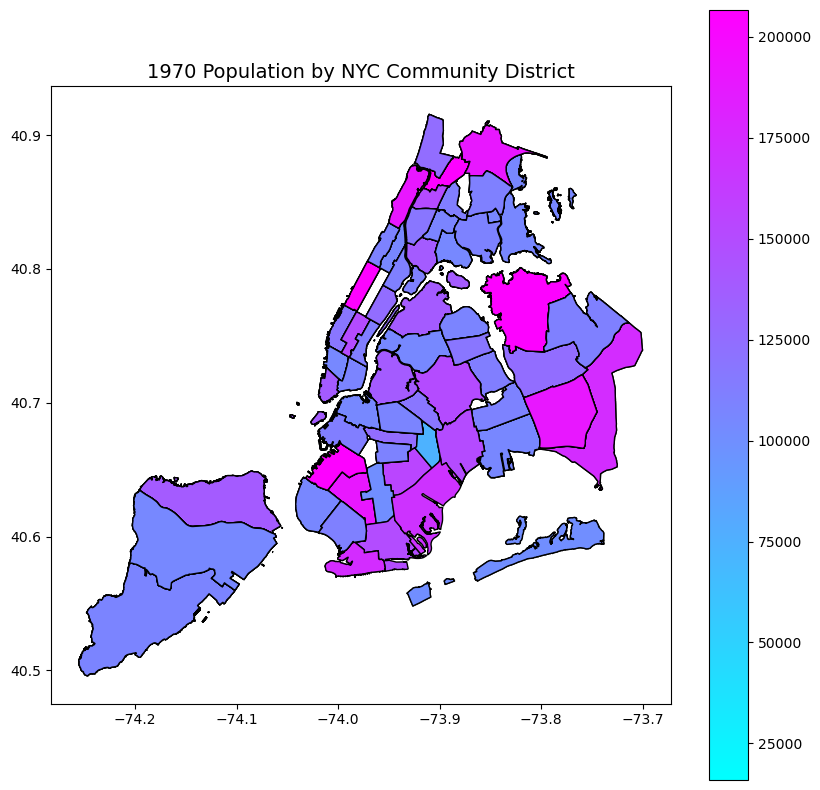

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

merged_data_frame.plot(edgecolor="black", column='_1980_population', cmap="cool", legend=True, ax=ax)
plt.title("1970 Population by NYC Community District", fontsize=14)
plt.show()


Since our merged dataframe has a 'geometry' column Matplotlib knows to render that geometry spatially